In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("sell_data.csv")
                # index_col = 'Year',
                # parse_dates=False)
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,ItemID,Quantity
0,2014-11-11,515025,14
1,2014-11-11,512210,73
2,2014-11-11,512340,44
3,2014-11-11,HA590140,1
4,2014-11-11,541004,125
...,...,...,...
164656,2024-06-17,515175,2
164657,2024-06-17,512332,2
164658,2024-06-17,512665,2
164659,2024-06-17,515159,1


In [2]:
input_id = ["515096"]  ## change to check for different hub

itemID = input_id #input the item id you want to search
mask = df['ItemID'].isin(itemID)
filtered_item = df[mask]
filtered_item

,Date,ItemID,Quantity
58,2014-11-12,515096,120
59,2014-11-12,515096,120
84,2014-11-19,515096,120
85,2014-11-19,515096,120
86,2014-11-19,515096,120
...,...,...,...
164630,2024-06-17,515096,150
164641,2024-06-17,515096,2
164643,2024-06-17,515096,1
164645,2024-06-17,515096,1


In [3]:
sale_table = filtered_item.groupby(filtered_item.Date.dt.year)['Quantity'].sum()
sale_table = pd.DataFrame({'Year':sale_table.index, 'Qty':sale_table.values})

### increase the value to get on the same graph with market qty
sale_table = sale_table.reset_index()  # make sure indexes pair with number of rows
original_sale_data = sale_table.copy() # make a copy of the original data

# for i in range(len(sale_table)):
#     sale_table.loc[i, 'Qty'] = sale_table.loc[i, 'Qty'] * 100 ## increase the value by 100 times
sale_table

,index,Year,Qty
0,0,2014,1200
1,1,2015,3538
2,2,2016,5850
3,3,2017,15713
4,4,2018,23175
5,5,2019,16575
6,6,2020,16571
7,7,2021,46920
8,8,2022,33770
9,9,2023,22095


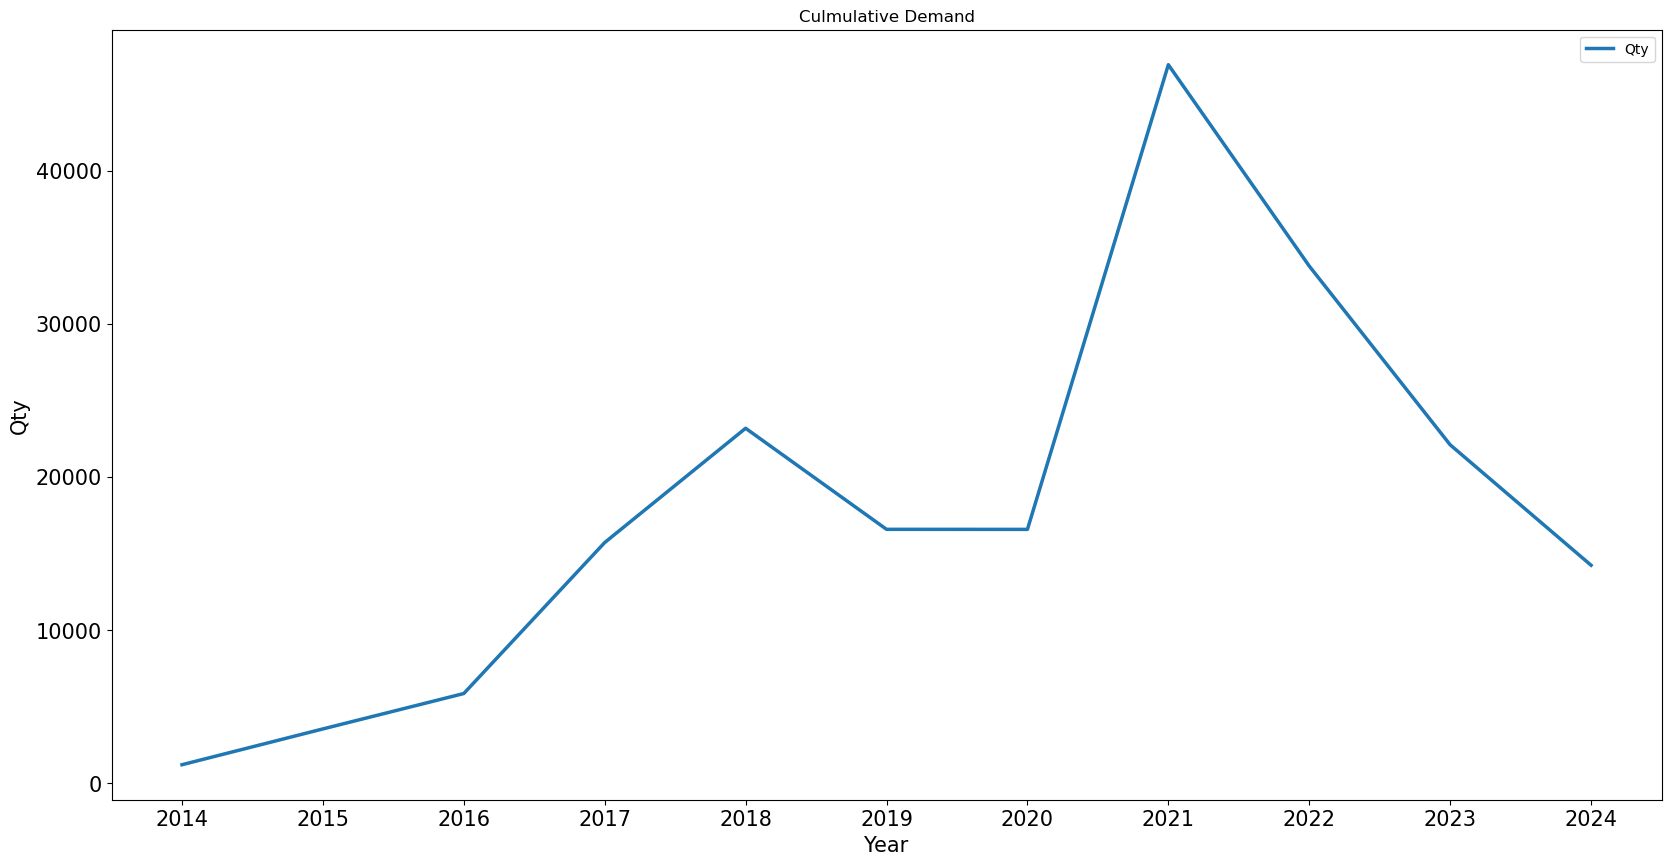

,index,Year,Qty
0,0,2014,1200
1,1,2015,3538
2,2,2016,5850
3,3,2017,15713
4,4,2018,23175
5,5,2019,16575
6,6,2020,16571
7,7,2021,46920
8,8,2022,33770
9,9,2023,22095


In [4]:
# plot the data
#sale_table.plot(x="Year", y="Qty", kind="line") 
sale_table['Qty'].plot(legend = True, label = 'Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(sale_table.index,sale_table["Year"].values)
# plotting a line plot after changing it's width and height

plt.show()
sale_table

2010 is out! 
2011 is out! 
2012 is out! 
2013 is out! 
    Year      Qty
0   2014  5189932
1   2015  6052024
2   2016  6930372
3   2017  6885530
4   2018  6541253
5   2019  6214190
6   2020  5903481
7   2021  4630325
8   2022  3695801
9   2023  3028112
10  2024  2273367
11  2025  1615967
12  2026   897208
13  2027   180624


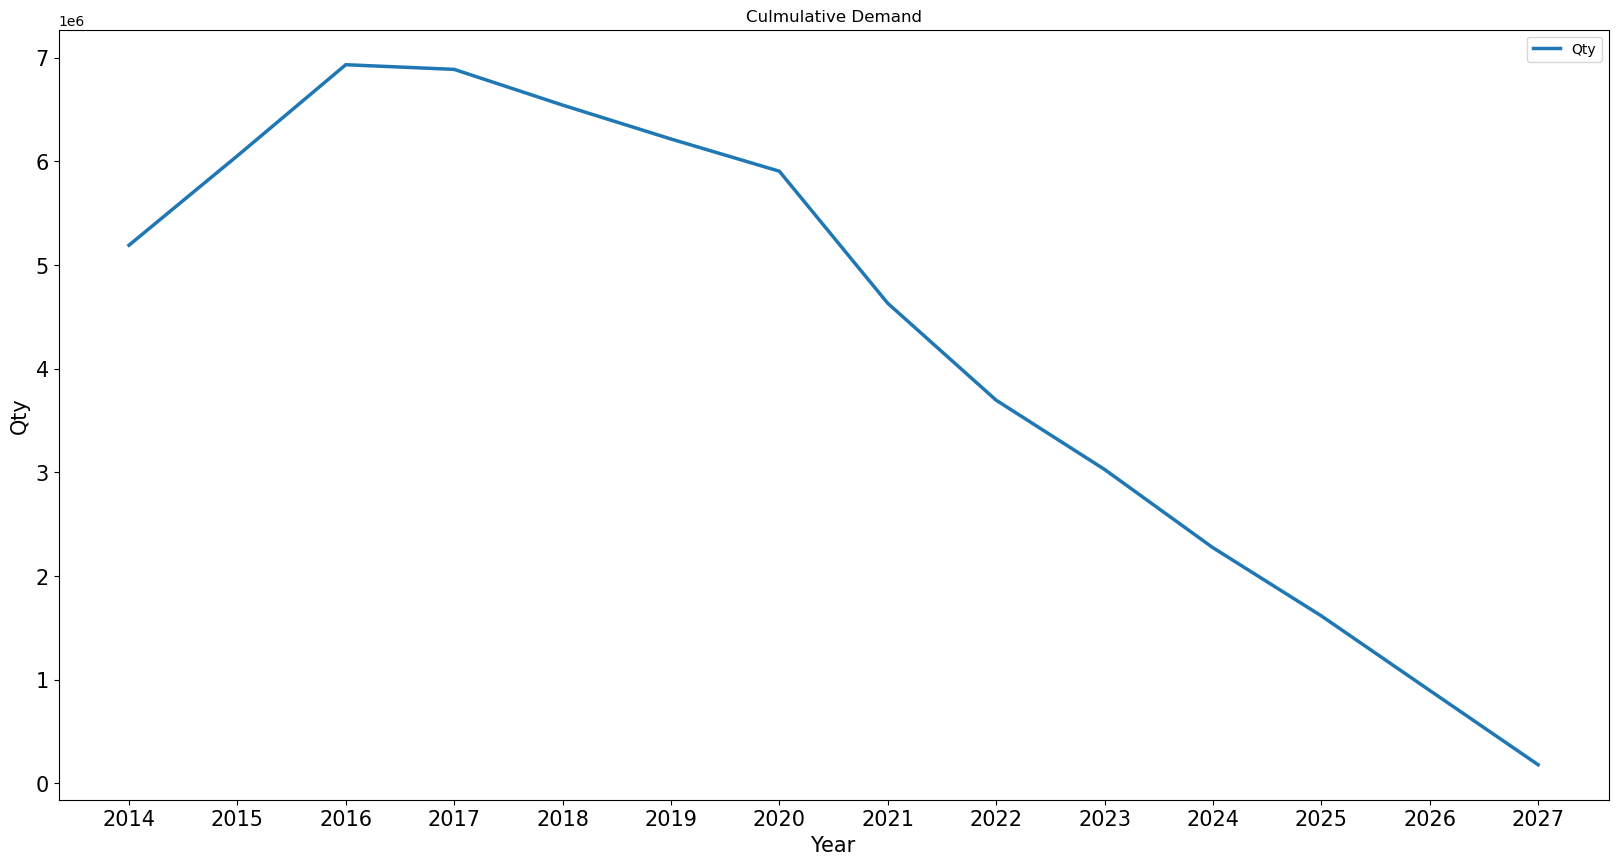

In [5]:
# plotting the market quantity graph, also remove the year prior to the starting year of the sale table

df = pd.read_csv("data.csv")
                # index_col = 'Year',
                # parse_dates=False)
itemID = input_id #input the item id you want to search
mask = df['ItemID'].isin(itemID)
filtered_item = df[mask]
yearly_total = {}
for index, row in filtered_item.iterrows(): # nice method to use
    year = row['Year']
    quantity = row['Quantity']
    if year not in yearly_total:
        yearly_total[year] = quantity
    else:
        yearly_total[year] += quantity
years = list(yearly_total.keys())
# creating the prediction of all total demand in the after-market (2010 -> 2027)
scrappage_rate = 0.05
after_market = {}
for current_year in range(years[0]+3,years[len(years)-1]+14,1):
    # check year that are in the after-market
    start_year = current_year -13
    end_year = current_year -3
    if(start_year < years[0]):
        start_year = years[0]
    year_included = years[start_year -years[0]:end_year-years[0]+1]
    #print(current_year,": ", year_included)
    #### calculate total up to current year###
    total = 0
    for year in year_included:
        total += yearly_total[year] *0.95**(current_year-(year+3)+1) ## 0.95 should be multiply extra n times for extra n years after 2010, 2010 is 1 time
        #print(year, ": " + str(current_year-(year+3)+1) + "times")
    after_market[current_year] = int(total)
    #print("**")
    #print(current_year, total)
# turn the dictionary into a df
market_table = pd.DataFrame(after_market.items(), columns=['Year', 'Qty'])

# remove the row prior to the start year of sale_table
start_year = sale_table.iloc[0]['Year']
remove_year = []
for i, row in market_table.iterrows():
    if (market_table.iloc[i]['Year'] < start_year):
        print(market_table.iloc[i]['Year'], "is out! ")
        remove_year.append(i)
market_table = market_table.drop(labels=remove_year, axis=0)
market_table = market_table.reset_index()
market_table = market_table.drop(labels="index", axis=1)
print(market_table)

# plot the data

market_table['Qty'].plot(legend = True, label = 'Qty', title = \
      "Culmulative Demand", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(market_table.index,market_table["Year"].values)
# plotting a line plot after changing it's width and height

plt.show()

In [6]:
# plotting the price table, also remove the year prior to the starting year of sale table
df = pd.read_csv("sale_price.csv")
                # index_col = 'Year',
                # parse_dates=False)
df['Date'] = pd.to_datetime(df['Date'])
itemID = input_id #input the item id you want to search
mask = df['ItemID'].isin(itemID)
filtered_item = df[mask]
filtered_item

price_table = filtered_item.groupby(filtered_item.Date.dt.year)['Price'].mean().round(0)
price_table = pd.DataFrame({'Year':price_table.index.astype(int), 'Price': price_table.values.astype(int)})


# remove the row prior to the start year of sale_table
start_year = sale_table.iloc[0]['Year']
remove_year = []
for i, row in price_table.iterrows():
    if (price_table.iloc[i]['Year'] < start_year):
        print(price_table.iloc[i]['Year'], "is out! ")
        remove_year.append(i)
price_table = price_table.drop(labels=remove_year, axis=0)
price_table = price_table.reset_index()
price_table = price_table.drop(labels="index", axis=1)

print(price_table)
ori_price_table = price_table.copy()
# adjust the price_table to the inverse
for i, row in price_table.iterrows():
    price_table.loc[i, "Price"] = 1/price_table.loc[i, "Price"]

print(price_table)

2012 is out! 
2013 is out! 
    Year  Price
0   2014     36
1   2015     33
2   2016     33
3   2017     34
4   2018     30
5   2019     28
6   2020     37
7   2021     23
8   2022     27
9   2023     29
10  2024     19
    Year     Price
0   2014  0.027778
1   2015  0.030303
2   2016  0.030303
3   2017  0.029412
4   2018  0.033333
5   2019  0.035714
6   2020  0.027027
7   2021  0.043478
8   2022  0.037037
9   2023  0.034483
10  2024  0.052632


C:\Users\Irving\AppData\Local\Temp\ipykernel_21800\514935388.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.027777777777777776' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  price_table.loc[i, "Price"] = 1/price_table.loc[i, "Price"]


In [7]:
# calculate the third line, which is the percentage between two of the line
end_year = 0
if market_table.iloc[len(market_table)-1]['Year'] > sale_table.iloc[len(sale_table)-1]['Year']:
    end_year = sale_table.iloc[len(sale_table)-1]['Year']
else:
    end_year = sale_table.iloc[len(market_table)-1]['Year']

valid_year_index = sale_table.index[sale_table['Year'] <= end_year].tolist()
valid_years = sale_table.iloc[:len(valid_year_index)]['Year']

rates = []
for i in (valid_year_index):
    sale = original_sale_data.iloc[i]['Qty']
    market = market_table.iloc[i]['Qty']
    print(original_sale_data.iloc[i]['Year'], " sale: ", original_sale_data.iloc[i]['Qty'], " market: ", market_table.iloc[i]['Qty'])
    rates.append(sale/market)
rates
d = {'Year':valid_years, 'Qty':rates}
rates_table = pd.DataFrame(data=d)
rates_table

original_rates = rates_table.copy() #copy the original untouched rates

# for i in range(len(rates_table)):
#     sale = original_sale_data.iloc[i]['Qty'] 
#     market = market_table.iloc[i]['Qty']
#     adjust_rate = (sale + market)/2
#     rates_table.loc[i, 'Qty'] = rates_table.loc[i, 'Qty'] * adjust_rate*100 ## increase the value by 100 times
rates_table

2014  sale:  1200  market:  5189932
2015  sale:  3538  market:  6052024
2016  sale:  5850  market:  6930372
2017  sale:  15713  market:  6885530
2018  sale:  23175  market:  6541253
2019  sale:  16575  market:  6214190
2020  sale:  16571  market:  5903481
2021  sale:  46920  market:  4630325
2022  sale:  33770  market:  3695801
2023  sale:  22095  market:  3028112
2024  sale:  14228  market:  2273367


,Year,Qty
0,2014,0.000231
1,2015,0.000585
2,2016,0.000844
3,2017,0.002282
4,2018,0.003543
5,2019,0.002667
6,2020,0.002807
7,2021,0.010133
8,2022,0.009137
9,2023,0.007297


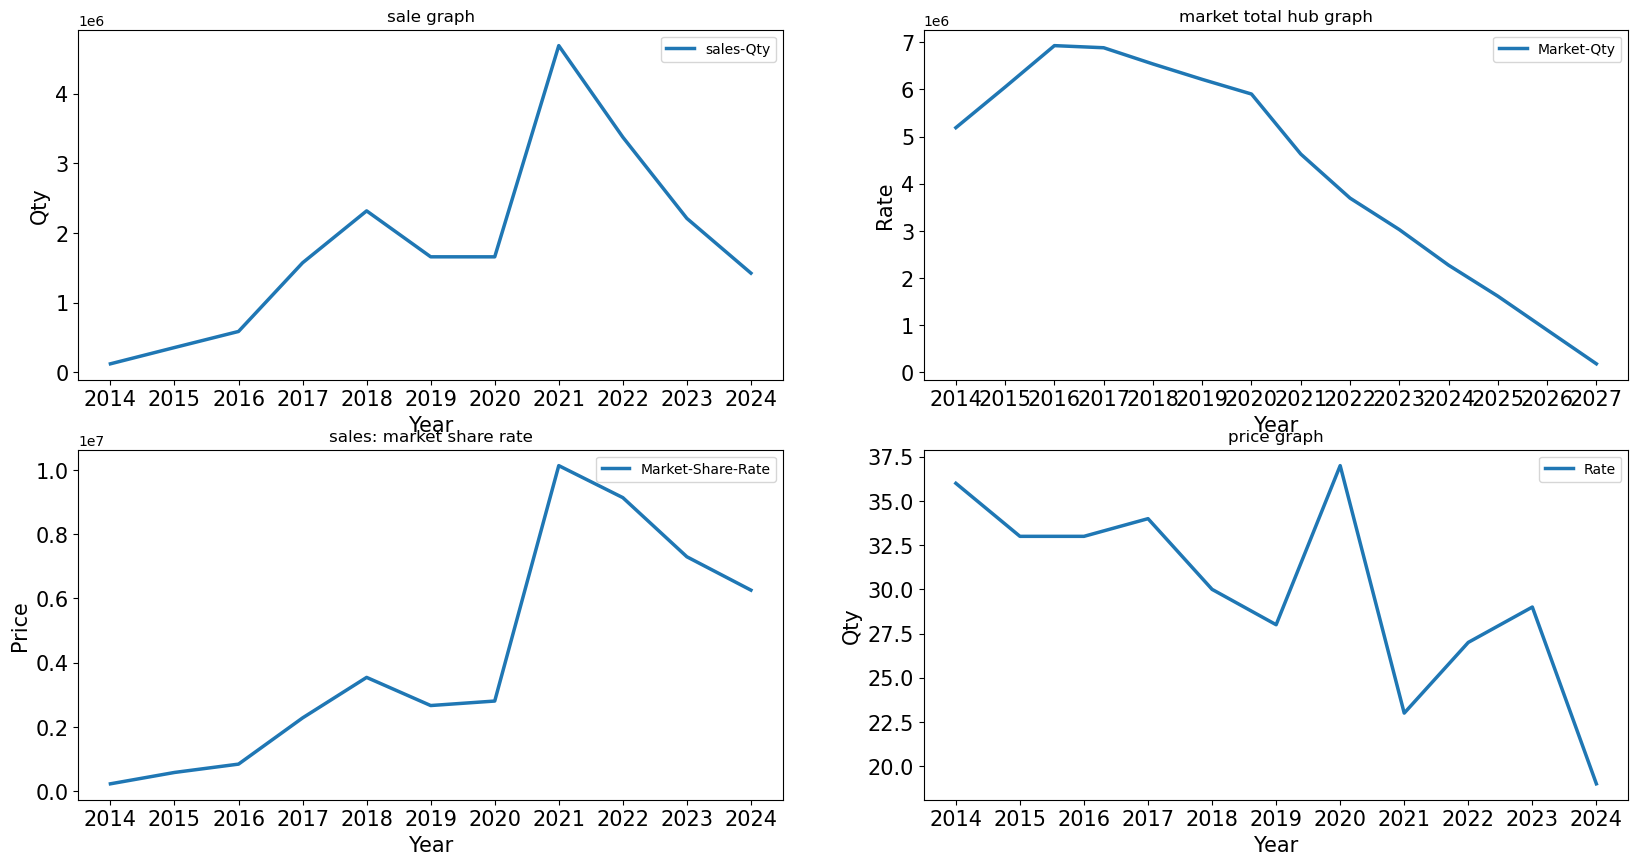

In [16]:
# plotting sale table

fig, axes = plt.subplots(nrows=2, ncols=2)

#plt.subplot(2,2,1)
my_title = str(input_id[0]) +" sales graph"
sale_table['Qty'].plot(legend = True, label = 'sales-Qty', title = \
      "sale graph", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10), ax=axes[0,0])
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.sca(axes[0, 0])
plt.xticks(sale_table.index,sale_table["Year"].values)

# plotting market table
#plt.subplot(2,2,1)
market_table['Qty'].plot(legend = True, label = 'Market-Qty', title = \
      "market total hub graph", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10),ax=axes[0,1])
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.sca(axes[0, 1])
plt.xticks(market_table.index,market_table["Year"].values)

# plotting rate table
#plt.subplot(2,2,1)
rates_table['Qty'].plot(legend = True, label = 'Market-Share-Rate', title = \
      "sales: market share rate", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10), ax=axes[1,0])
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Rate', fontsize=15)
plt.sca(axes[1, 0])
plt.xticks(rates_table.index,rates_table["Year"].values)

# plotting price table
#plt.subplot(2,2,1)
ori_price_table['Price'].plot(legend = True, label = 'Rate', title = \
      "price graph", style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10), ax=axes[1,1])
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.sca(axes[1, 1])
plt.xticks(ori_price_table.index,ori_price_table["Year"].values)

plt.show()

In [9]:
import math
import statistics
# adjust all four of the table to make them appear on a scale 1-10
m_t = 0
s_t = 0
r_t = 0
p_t = 0

for i in range(len(market_table)):
    m_t += (market_table.iloc[i]['Qty'])
for i in range(len(sale_table)):
    s_t += (sale_table.iloc[i]['Qty'])
for i in range(len(rates_table)):
    r_t += (rates_table.iloc[i]['Qty'])
for i in range(len(price_table)):
    p_t += (price_table.iloc[i]['Price'])

# market_median = statistics.median(m_t)
# sale_median = statistics.median(s_t)
# rate_median = statistics.median(r_t)
# print(market_median,sale_median,rate_median)

market_avg = m_t / len(market_table)
sale_avg = s_t / len(sale_table)
rate_avg = r_t / len(rates_table)
price_avg = p_t / len(price_table)
print(market_avg,sale_avg,rate_avg,price_avg)

# Calculate number of digits after first digit
market_d = math.floor(math.log10(market_avg)) 
sale_d = math.floor(math.log10(sale_avg)) 
rate_d = math.floor(math.log10(rate_avg))
price_d = math.floor(math.log10(price_avg))

digit_list = [market_d, sale_d, rate_d,price_d]
max_digit = max(market_d, sale_d, rate_d,price_d)

print(digit_list)

# iterrate through digit_list to see which table need adjustment
adjustment_list =[]
for i in range(len(digit_list)):
    digit = digit_list[i]
    if i==0:
        if digit < max_digit:
            adjustment_list.append("market")
            
    if i==1:
        if digit < max_digit:
            adjustment_list.append("sale")
    if i==2:
        if digit < max_digit:
            adjustment_list.append("rate")
    if i==3:
        if digit < max_digit:
            adjustment_list.append("price")
        


print(adjustment_list)

if "market" in adjustment_list:
    for i in range(len(market_table)):
        market_table.loc[i, 'Qty'] = market_table.loc[i, 'Qty'] * 10**(max_digit - market_d)
if "sale" in adjustment_list:
    for i in range(len(sale_table)):
        sale_table.loc[i, 'Qty'] = sale_table.loc[i, 'Qty'] * 10**(max_digit - sale_d)
if "rate" in adjustment_list:
    for i in range(len(rates_table)):
        rates_table.loc[i, 'Qty'] = rates_table.loc[i, 'Qty'] * 10**(max_digit - rate_d)   
if "price" in adjustment_list:
    for i in range(len(price_table)):
        price_table.loc[i, 'Price'] = price_table.loc[i, 'Price'] * 10**(max_digit - price_d)

price_table

4288441.857142857 18148.636363636364 0.004162264155096007 0.03468180769445701
[6, 4, -3, -2]
['sale', 'rate', 'price']


,Year,Price
0,2014,2.777778e+06
1,2015,3.030303e+06
2,2016,3.030303e+06
3,2017,2.941176e+06
4,2018,3.333333e+06
5,2019,3.571429e+06
6,2020,2.702703e+06
7,2021,4.347826e+06
8,2022,3.703704e+06
9,2023,3.448276e+06


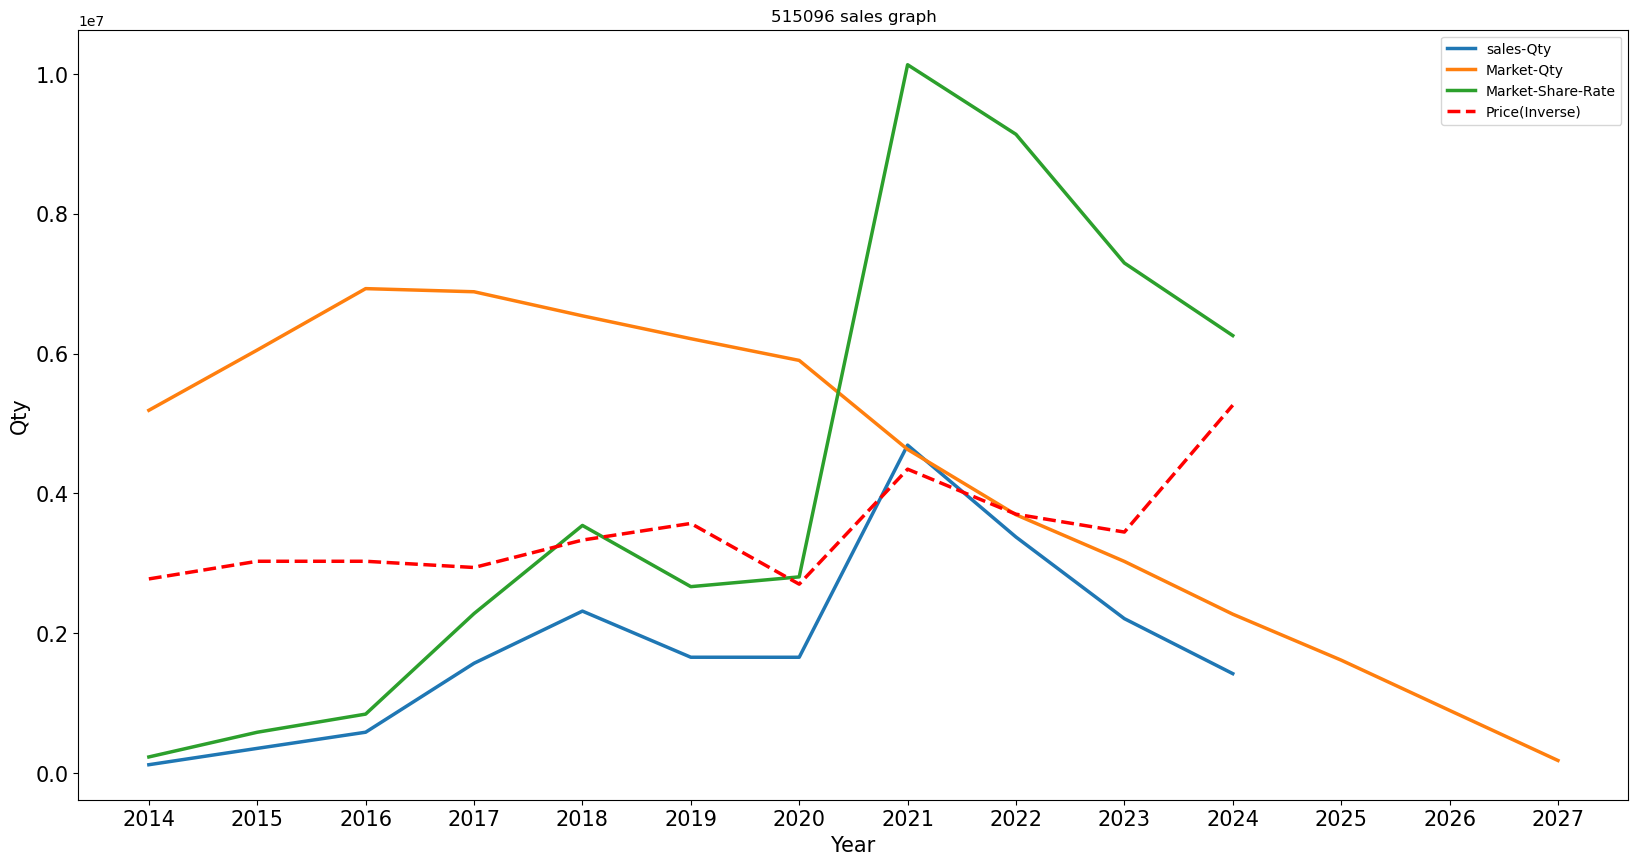

In [10]:
# plotting sale table
my_title = str(input_id[0]) +" sales graph"
sale_table['Qty'].plot(legend = True, label = 'sales-Qty', title = \
      my_title, style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)
plt.xticks(sale_table.index,sale_table["Year"].values)

# plotting market table
market_table['Qty'].plot(legend = True, label = 'Market-Qty', title = \
      my_title, style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)

# plotting rate table 
rates_table['Qty'].plot(legend = True, label = 'Market-Share-Rate', title = \
      my_title, style = '-', linewidth = 2.5, fontsize=15,figsize=(20, 10))
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)

# plotting price table
price_table['Price'].plot(legend = True, label = 'Price(Inverse)', title = \
      my_title, style = '--', linewidth = 2.5, fontsize=15,figsize=(20, 10), color='red')
# naming the x and y axis
plt.xlabel('Year', fontsize=15)
plt.ylabel('Qty', fontsize=15)

if market_table.iloc[len(market_table)-1]['Year'] > sale_table.iloc[len(sale_table)-1]['Year']:
    plt.xticks(market_table.index,market_table["Year"].values)
else:
    plt.xticks(sale_table.index,sale_table["Year"].values)

# plt.xlim(market_table.index.min(), market_table.index.max())

plt.show()